<a href="https://colab.research.google.com/github/sweetyjunnarkar/Facebook-comment_volume-prediction/blob/main/Sweety_Junnarkar_Team_5_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : 'Facebook Comment Volume Prediction', </u></b>

ABSTRACT='The leading treads towards social networking services had drawn massive
public attention from last one and half decade. The amount of data that is
uploaded to these social networking services is increasing day by day. So,
there is massive requirement to study the highly dynamic behavior of users
towards these services. This is a preliminary work to model the user
patterns and to study the effectiveness of machine learning predictive
modeling approaches on leading social networking service Facebook. We
modeled the user comment patters, over the posts on Facebook Pages and
predicted that how many comments a post is expected to receive in next H
hrs. In order to automate the process, we developed a software prototype
consisting of the crawler, Information extractor, information processor and
knowledge discovery module. We used Neural Networks and Decision Trees,
predictive modeling techniques on different dataset variants and evaluated
them under Hits(at)10 (custom measure), Area Under Curve, Evaluation Time
and Mean Absolute error evaluation metrics. We concluded that the Decision
trees performed better than the Neural Networks under light of all
evaluation metrics.'
}


1)
Page Popularity/likes
Decimal Encoding
Page feature
Defines the popularity or support for the source of the document.


2)
Page Checkinsâ€™s
Decimal Encoding
Page feature
Describes how many individuals so far visited this place. This feature is only associated with the places eg:some institution, place, theater etc.


3)
Page talking about
Decimal Encoding
Page feature
Defines the daily interest of individuals towards source of the document/ Post. The people who actually come back to the page, after liking the page. This include activities such as comments, likes to a post, shares, etc by visitors to the page.


4)
Page Category
Value Encoding
Page feature
Defines the category of the source of the document eg: place, institution, brand etc.


5- 29: 
Derived
Decimal Encoding
Derived feature
These features are aggregated by page, by calculating min, max, average, median and standard deviation of essential features.


30)
CC1
Decimal Encoding
Essential feature
The total number of comments before selected base date/time.


31)
CC2
Decimal Encoding
Essential feature
The number of comments in last 24 hours, relative to base date/time.


32)
CC3
Decimal Encoding
Essential feature
The number of comments in last 48 to last 24 hours relative to base date/time.


33
CC4
Decimal Encoding
Essential feature
The number of comments in the first 24 hours after the publication of post but before base date/time.


34
CC5
Decimal Encoding
Essential feature
The difference between CC2 and CC3.


35
Base time
Decimal(0-71) Encoding
Other feature
Selected time in order to simulate the scenario.


36
Post length
Decimal Encoding
Other feature
Character count in the post.


37
Post Share Count
ï¿¼ï¿¼Decimal Encoding
Other feature
This features counts the no of shares of the post, that how many peoples had shared this post on to their timeline.


38
Post Promotion Status
ï¿¼ï¿¼Binary Encoding
Other feature
To reach more people with posts in News Feed, individual promote their post and this features tells that whether the post is promoted(1) or not(0).


39
H Local
ï¿¼Decimal(0-23) Encoding
Other feature
This describes the H hrs, for which we have the target variable/ comments received.


40-46
Post published weekday
Binary Encoding
Weekdays feature
This represents the day(Sunday...Saturday) on which the post was published.


47-53
Base DateTime weekday
Binary Encoding
Weekdays feature
This represents the day(Sunday...Saturday) on selected base Date/Time.

54
Target Variable
Decimal
Target
The no of comments in next H hrs(H is given in Feature no 39).



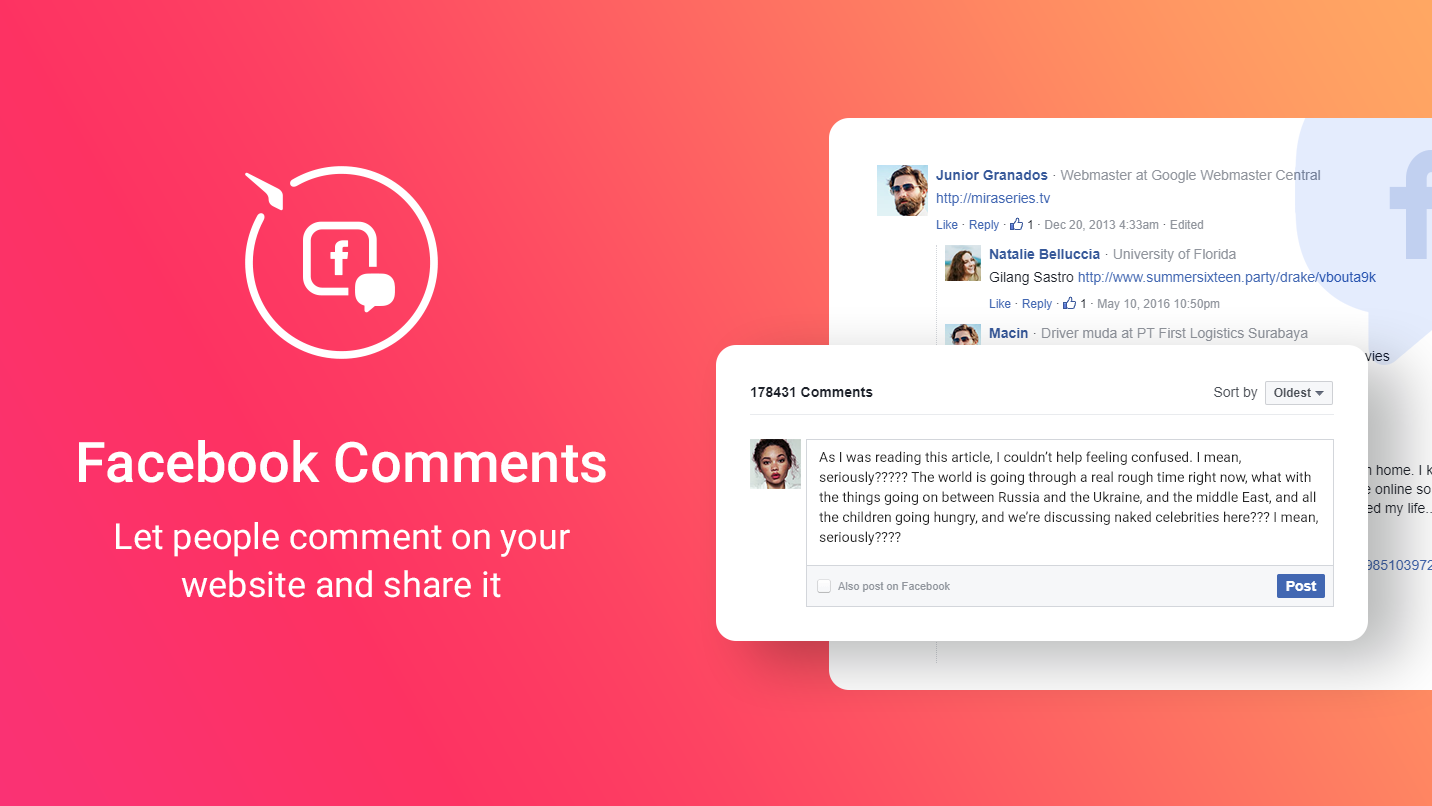

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Data/Features_Variant_1.csv",header=None)

In [4]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,65,166,2,0,24,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,10,132,1,0,24,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,14,133,2,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,7,0,3,7,-3,62,131,1,0,24,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,1,0,0,1,0,58,142,5,0,24,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,269,14,58,240,-44,56,12,1511,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
40945,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,644,20,106,619,-86,53,149,1099,0,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2
40946,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,620,620,0,620,620,19,120,2962,0,24,0,0,0,1,0,0,0,0,0,0,0,1,0,0,72
40947,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,1881.0,283.720000,75.0,463.431334,0.0,712.0,129.480000,71.0,189.682075,0.0,1881.0,482.400000,240.0,495.255247,-449.0,1881.0,154.240000,-6.0,490.821538,629,189,440,588,-251,33,33,1383,0,9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,28


In [5]:
df2=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Data/Features_TestSet.csv",header=None)

In [6]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,634995,0,463,1,1.0,17.0,7.000000,2.0,6.663332,1.0,17.0,5.000000,2.0,6.033241,0.0,10.0,2.00000,0.0,4.000000,1.0,17.0,7.000000,2.0,6.663332,-7.0,17.0,3.000000,2.0,7.771744,2,2,0,2,2,2,84,2,0,24,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1,634995,0,463,1,1.0,17.0,7.000000,2.0,6.663332,1.0,17.0,5.000000,2.0,6.033241,0.0,10.0,2.00000,0.0,4.000000,1.0,17.0,7.000000,2.0,6.663332,-7.0,17.0,3.000000,2.0,7.771744,2,2,0,2,2,13,89,1,0,24,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,1.0,17.0,7.000000,2.0,6.663332,1.0,17.0,5.000000,2.0,6.033241,0.0,10.0,2.00000,0.0,4.000000,1.0,17.0,7.000000,2.0,6.663332,-7.0,17.0,3.000000,2.0,7.771744,1,1,0,1,1,2,154,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,634995,0,463,1,1.0,17.0,7.000000,2.0,6.663332,1.0,17.0,5.000000,2.0,6.033241,0.0,10.0,2.00000,0.0,4.000000,1.0,17.0,7.000000,2.0,6.663332,-7.0,17.0,3.000000,2.0,7.771744,13,3,10,13,-7,30,118,2,0,24,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,634995,0,463,1,1.0,17.0,7.000000,2.0,6.663332,1.0,17.0,5.000000,2.0,6.033241,0.0,10.0,2.00000,0.0,4.000000,1.0,17.0,7.000000,2.0,6.663332,-7.0,17.0,3.000000,2.0,7.771744,17,17,0,17,17,17,183,1,0,13,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10039,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.73913,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,480,56,424,475,-368,28,94,287,0,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
10040,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.73913,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,1393,334,1059,1379,-725,27,59,1414,0,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,13
10041,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.73913,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,0,0,0,0,0,0,175,673,0,24,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1087
10042,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.73913,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,550,550,0,550,550,14,159,124,0,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,14


In [7]:
data=[df1,df2]
df=pd.concat(data,axis=0,ignore_index=True)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,65,166,2,0,24,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,10,132,1,0,24,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,14,133,2,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,7,0,3,7,-3,62,131,1,0,24,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,1,0,0,1,0,58,142,5,0,24,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50988,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,480,56,424,475,-368,28,94,287,0,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
50989,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,1393,334,1059,1379,-725,27,59,1414,0,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,13
50990,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,0,0,0,0,0,0,175,673,0,24,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1087
50991,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,550,550,0,550,550,14,159,124,0,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,14


In [9]:
columns={0:"Page_likes",1:"Page_views",2:"Daily_visitors",3:"page_type",4:"der_1",5:"der_2",6:"der_3",7:"der_4",8:"der_5",9:"der_6",10:"der_7",
         11:"der_8",12:"der_9",13:"der_10",14:"der_11",15:"der_12",16:"der_13",17:"der_14",18:"der_15",19:"der_16",20:"der_17",
         21:"der_18",22:"der_19",23:"der_20",24:"der_21",25:"der_22",26:"der_23",27:"der_24",28:"der_25",29:"CC1",30:"CC2",
         31:"CC3",32:"CC4",33:"CC5",34:"Base_time",35:"Post_length",36:"Post_share_count",37:"Post_promotion_status",38:"Hr",39:"Sun",40:"Mon",
         41:"Tues",42:"Wed",43:"Thurs",44:"Fri",45:"Sat",46:"Sun_time",47:"Mon_time",48:"Tues_time",49:"Wed_time",50:"Thurs_time",51:"Fri_time",52:"Sat_time",53:"Num_of_comments"}

In [10]:
df=df.rename(columns=columns)

In [11]:
df

,Page_likes,Page_views,Daily_visitors,page_type,der_1,der_2,der_3,der_4,der_5,der_6,der_7,der_8,der_9,der_10,der_11,der_12,der_13,der_14,der_15,der_16,der_17,der_18,der_19,der_20,der_21,der_22,der_23,der_24,der_25,CC1,CC2,CC3,CC4,CC5,Base_time,Post_length,Post_share_count,Post_promotion_status,Hr,Sun,Mon,Tues,Wed,Thurs,Fri,Sat,Sun_time,Mon_time,Tues_time,Wed_time,Thurs_time,Fri_time,Sat_time,Num_of_comments
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,65,166,2,0,24,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,10,132,1,0,24,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,14,133,2,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,7,0,3,7,-3,62,131,1,0,24,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,1,0,0,1,0,58,142,5,0,24,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50988,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,480,56,424,475,-368,28,94,287,0,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
50989,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,1393,334,1059,1379,-725,27,59,1414,0,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,13
50990,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,0,0,0,0,0,0,175,673,0,24,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1087
50991,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,550,550,0,550,550,14,159,124,0,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,14


In [12]:
df.isnull().sum()

Page_likes               0
Page_views               0
Daily_visitors           0
page_type                0
der_1                    0
der_2                    0
der_3                    0
der_4                    0
der_5                    0
der_6                    0
der_7                    0
der_8                    0
der_9                    0
der_10                   0
der_11                   0
der_12                   0
der_13                   0
der_14                   0
der_15                   0
der_16                   0
der_17                   0
der_18                   0
der_19                   0
der_20                   0
der_21                   0
der_22                   0
der_23                   0
der_24                   0
der_25                   0
CC1                      0
CC2                      0
CC3                      0
CC4                      0
CC5                      0
Base_time                0
Post_length              0
Post_share_count         0
P

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50993 entries, 0 to 50992
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Page_likes             50993 non-null  int64  
 1   Page_views             50993 non-null  int64  
 2   Daily_visitors         50993 non-null  int64  
 3   page_type              50993 non-null  int64  
 4   der_1                  50993 non-null  float64
 5   der_2                  50993 non-null  float64
 6   der_3                  50993 non-null  float64
 7   der_4                  50993 non-null  float64
 8   der_5                  50993 non-null  float64
 9   der_6                  50993 non-null  float64
 10  der_7                  50993 non-null  float64
 11  der_8                  50993 non-null  float64
 12  der_9                  50993 non-null  float64
 13  der_10                 50993 non-null  float64
 14  der_11                 50993 non-null  float64
 15  de

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Page_likes,50993.0,1.877146e+06,7.533330e+06,36.0,58626.000000,416948.000000,1.720897e+06,4.869723e+08
Page_views,50993.0,4.980811e+03,2.591421e+04,0.0,0.000000,0.000000,6.200000e+01,1.100558e+06
Daily_visitors,50993.0,9.133800e+04,2.636394e+05,0.0,1484.000000,14041.000000,7.301100e+04,6.784263e+06
page_type,50993.0,2.372473e+01,1.989765e+01,1.0,9.000000,18.000000,3.200000e+01,1.070000e+02
der_1,50993.0,3.197478e+00,4.074436e+01,0.0,0.000000,0.000000,0.000000e+00,2.575000e+03
der_2,50993.0,5.006841e+02,5.902810e+02,0.0,47.000000,257.000000,7.550000e+02,2.858000e+03
der_3,50993.0,6.458663e+01,1.074238e+02,0.0,6.151515,26.944206,8.423077e+01,2.575000e+03
der_4,50993.0,4.019279e+01,8.605073e+01,0.0,3.000000,13.000000,4.300000e+01,2.575000e+03
der_5,50993.0,8.008381e+01,1.036198e+02,0.0,8.914547,38.486299,1.187185e+02,1.101000e+03
der_6,50993.0,1.189948e+00,2.396676e+01,0.0,0.000000,0.000000,0.000000e+00,1.923000e+03


Lets visualize the day columns

In [15]:
df[df['Sun']==1]

,Page_likes,Page_views,Daily_visitors,page_type,der_1,der_2,der_3,der_4,der_5,der_6,der_7,der_8,der_9,der_10,der_11,der_12,der_13,der_14,der_15,der_16,der_17,der_18,der_19,der_20,der_21,der_22,der_23,der_24,der_25,CC1,CC2,CC3,CC4,CC5,Base_time,Post_length,Post_share_count,Post_promotion_status,Hr,Sun,Mon,Tues,Wed,Thurs,Fri,Sat,Sun_time,Mon_time,Tues_time,Wed_time,Thurs_time,Fri_time,Sat_time,Num_of_comments
61,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,69,35,34,65,1,30,197,37,0,24,1,0,0,0,0,0,0,0,1,0,0,0,0,0,3
91,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,4,0,4,4,-4,29,130,1,0,24,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
142,3995273,0,297147,4,43.0,2007.0,603.141026,494.5,424.681501,1.0,1345.0,252.897436,133.5,293.772875,0.0,1605.0,226.846154,75.5,345.690542,38.0,1771.0,564.576923,473.5,382.314326,-1364.0,1345.0,26.051282,-50.5,481.588874,1001,68,611,924,-543,49,14,353,0,24,1,0,0,0,0,0,0,0,0,1,0,0,0,0,8
143,3995273,0,297147,4,43.0,2007.0,603.141026,494.5,424.681501,1.0,1345.0,252.897436,133.5,293.772875,0.0,1605.0,226.846154,75.5,345.690542,38.0,1771.0,564.576923,473.5,382.314326,-1364.0,1345.0,26.051282,-50.5,481.588874,198,198,0,198,198,17,61,173,0,24,1,0,0,0,0,0,0,0,1,0,0,0,0,0,30
154,3995273,0,297147,4,43.0,2007.0,603.141026,494.5,424.681501,1.0,1345.0,252.897436,133.5,293.772875,0.0,1605.0,226.846154,75.5,345.690542,38.0,1771.0,564.576923,473.5,382.314326,-1364.0,1345.0,26.051282,-50.5,481.588874,315,115,200,310,-85,27,28,271,0,24,1,0,0,0,0,0,0,0,1,0,0,0,0,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50987,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,1123,90,1033,1112,-943,31,92,857,0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2
50988,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,480,56,424,475,-368,28,94,287,0,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
50989,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,1393,334,1059,1379,-725,27,59,1414,0,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,13
50990,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,0,0,0,0,0,0,175,673,0,24,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1087


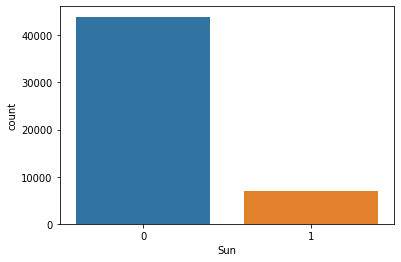

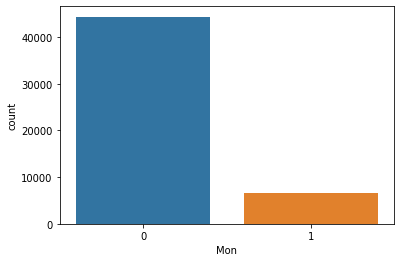

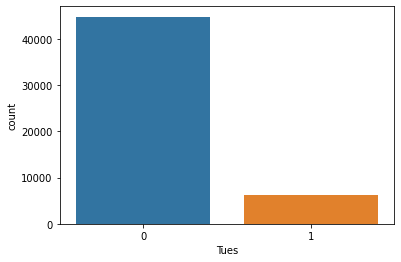

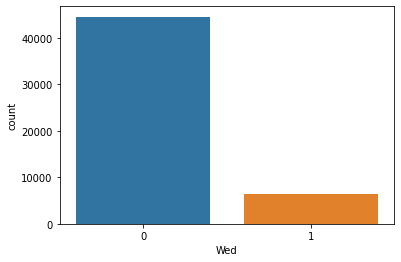

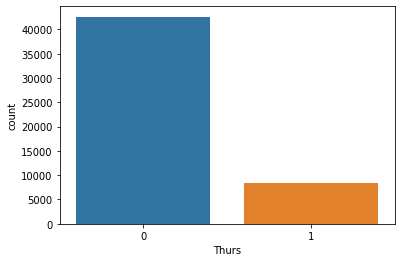

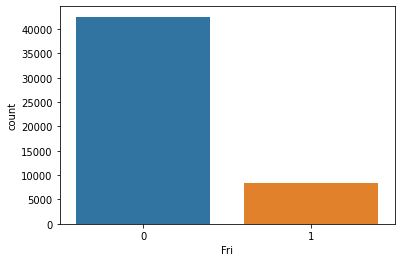

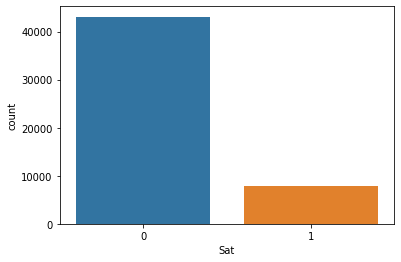

In [16]:
col_list=["Sun","Mon","Tues","Wed","Thurs","Fri","Sat"]
for i, col in enumerate(col_list):
    plt.figure(i)
    sns.countplot(x=col, data=df)

In [17]:
Sun=df[df["Sun"]==1]['Num_of_comments'].sum()
Mon=df[df["Mon"]==1]['Num_of_comments'].sum()
Tues=df[df["Tues"]==1]['Num_of_comments'].sum()
Fri=df[df["Fri"]==1]['Num_of_comments'].sum()
Wed=df[df["Wed"]==1]['Num_of_comments'].sum()
Thurs=df[df["Thurs"]==1]['Num_of_comments'].sum()
Sat=df[df["Sat"]==1]['Num_of_comments'].sum()
print(Sun)
print(Sat)
print(Mon)
print(Tues)
print(Thurs)
print(Fri)
print(Wed)

110780
90297
93703
45559
96728
98056
58433


In [18]:
df[df['Num_of_comments'].sort_values(ascending=False)==2412]

,Page_likes,Page_views,Daily_visitors,page_type,der_1,der_2,der_3,der_4,der_5,der_6,der_7,der_8,der_9,der_10,der_11,der_12,der_13,der_14,der_15,der_16,der_17,der_18,der_19,der_20,der_21,der_22,der_23,der_24,der_25,CC1,CC2,CC3,CC4,CC5,Base_time,Post_length,Post_share_count,Post_promotion_status,Hr,Sun,Mon,Tues,Wed,Thurs,Fri,Sat,Sun_time,Mon_time,Tues_time,Wed_time,Thurs_time,Fri_time,Sat_time,Num_of_comments
49343,25120426,0,1212064,4,0.0,319.0,159.5,159.5,159.5,0.0,319.0,159.5,159.5,159.5,0.0,0.0,0.0,0.0,0.0,0.0,319.0,159.5,159.5,159.5,0.0,319.0,159.5,159.5,159.5,0,0,0,0,0,0,657,1078,0,24,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2412


We can see that the more comments are on wednesday.

So I am making one column of weekdays and one column of weekends.

In [19]:
df['weekdays']=df['Mon']+df['Tues']+df['Wed']+df['Thurs']+df['Fri']
lst=['Mon','Tues','Wed','Thurs','Fri']
df.drop(lst,axis=1,inplace=True)

In [20]:
df['weekend']=df['Sat']+df['Sun']
df.drop(['Sat','Sun'],axis=1,inplace=True)

In [21]:
df

,Page_likes,Page_views,Daily_visitors,page_type,der_1,der_2,der_3,der_4,der_5,der_6,der_7,der_8,der_9,der_10,der_11,der_12,der_13,der_14,der_15,der_16,der_17,der_18,der_19,der_20,der_21,der_22,der_23,der_24,der_25,CC1,CC2,CC3,CC4,CC5,Base_time,Post_length,Post_share_count,Post_promotion_status,Hr,Sun_time,Mon_time,Tues_time,Wed_time,Thurs_time,Fri_time,Sat_time,Num_of_comments,weekdays,weekend
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,65,166,2,0,24,0,0,0,0,0,0,1,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,10,132,1,0,24,0,0,0,0,0,1,0,0,1,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,14,133,2,0,24,0,0,0,0,0,0,1,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,7,0,3,7,-3,62,131,1,0,24,0,1,0,0,0,0,0,0,1,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,1,0,0,1,0,58,142,5,0,24,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50988,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,480,56,424,475,-368,28,94,287,0,5,0,1,0,0,0,0,0,1,0,1
50989,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,1393,334,1059,1379,-725,27,59,1414,0,6,0,1,0,0,0,0,0,13,0,1
50990,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,0,0,0,0,0,0,175,673,0,24,1,0,0,0,0,0,0,1087,0,1
50991,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,550,550,0,550,550,14,159,124,0,5,0,1,0,0,0,0,0,14,0,1


In [22]:
df['weekday_base']=df['Mon_time']+df['Tues_time']+df['Wed_time']+df['Thurs_time']+df['Fri_time']
df.drop(['Mon_time','Tues_time','Wed_time','Thurs_time','Fri_time'],axis=1,inplace=True)

In [23]:
df

,Page_likes,Page_views,Daily_visitors,page_type,der_1,der_2,der_3,der_4,der_5,der_6,der_7,der_8,der_9,der_10,der_11,der_12,der_13,der_14,der_15,der_16,der_17,der_18,der_19,der_20,der_21,der_22,der_23,der_24,der_25,CC1,CC2,CC3,CC4,CC5,Base_time,Post_length,Post_share_count,Post_promotion_status,Hr,Sun_time,Sat_time,Num_of_comments,weekdays,weekend,weekday_base
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,65,166,2,0,24,0,1,0,1,0,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,10,132,1,0,24,0,0,0,1,0,1
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,14,133,2,0,24,0,1,0,1,0,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,7,0,3,7,-3,62,131,1,0,24,0,0,0,1,0,1
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,1,0,0,1,0,58,142,5,0,24,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50988,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,480,56,424,475,-368,28,94,287,0,5,0,0,1,0,1,1
50989,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,1393,334,1059,1379,-725,27,59,1414,0,6,0,0,13,0,1,1
50990,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,0,0,0,0,0,0,175,673,0,24,1,0,1087,0,1,0
50991,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,550,550,0,550,550,14,159,124,0,5,0,0,14,0,1,1


In [24]:
df['Weekend_base']=df['Sat_time']+df['Sun_time']
df.drop(['Sat_time','Sun_time'],axis=1,inplace=True)

In [25]:
df

,Page_likes,Page_views,Daily_visitors,page_type,der_1,der_2,der_3,der_4,der_5,der_6,der_7,der_8,der_9,der_10,der_11,der_12,der_13,der_14,der_15,der_16,der_17,der_18,der_19,der_20,der_21,der_22,der_23,der_24,der_25,CC1,CC2,CC3,CC4,CC5,Base_time,Post_length,Post_share_count,Post_promotion_status,Hr,Num_of_comments,weekdays,weekend,weekday_base,Weekend_base
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,65,166,2,0,24,0,1,0,0,1
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,10,132,1,0,24,0,1,0,1,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,14,133,2,0,24,0,1,0,0,1
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,7,0,3,7,-3,62,131,1,0,24,0,1,0,1,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,1,0,0,1,0,58,142,5,0,24,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50988,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,480,56,424,475,-368,28,94,287,0,5,1,0,1,1,0
50989,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,1393,334,1059,1379,-725,27,59,1414,0,6,13,0,1,1,0
50990,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,0,0,0,0,0,0,175,673,0,24,1087,0,1,0,1
50991,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,550,550,0,550,550,14,159,124,0,5,14,0,1,1,0


We can see the promotion status column which are having null values.So no sense of keeping it.

In [26]:
df['Post_promotion_status'].value_counts()

0    50993
Name: Post_promotion_status, dtype: int64

In [27]:
df.drop('Post_promotion_status',axis=1,inplace=True)

In [28]:
df

,Page_likes,Page_views,Daily_visitors,page_type,der_1,der_2,der_3,der_4,der_5,der_6,der_7,der_8,der_9,der_10,der_11,der_12,der_13,der_14,der_15,der_16,der_17,der_18,der_19,der_20,der_21,der_22,der_23,der_24,der_25,CC1,CC2,CC3,CC4,CC5,Base_time,Post_length,Post_share_count,Hr,Num_of_comments,weekdays,weekend,weekday_base,Weekend_base
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,65,166,2,24,0,1,0,0,1
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,10,132,1,24,0,1,0,1,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,14,133,2,24,0,1,0,0,1
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,7,0,3,7,-3,62,131,1,24,0,1,0,1,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,1,0,0,1,0,58,142,5,24,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50988,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,480,56,424,475,-368,28,94,287,5,1,0,1,1,0
50989,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,1393,334,1059,1379,-725,27,59,1414,6,13,0,1,1,0
50990,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,0,0,0,0,0,0,175,673,24,1087,0,1,0,1
50991,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,550,550,0,550,550,14,159,124,5,14,0,1,1,0


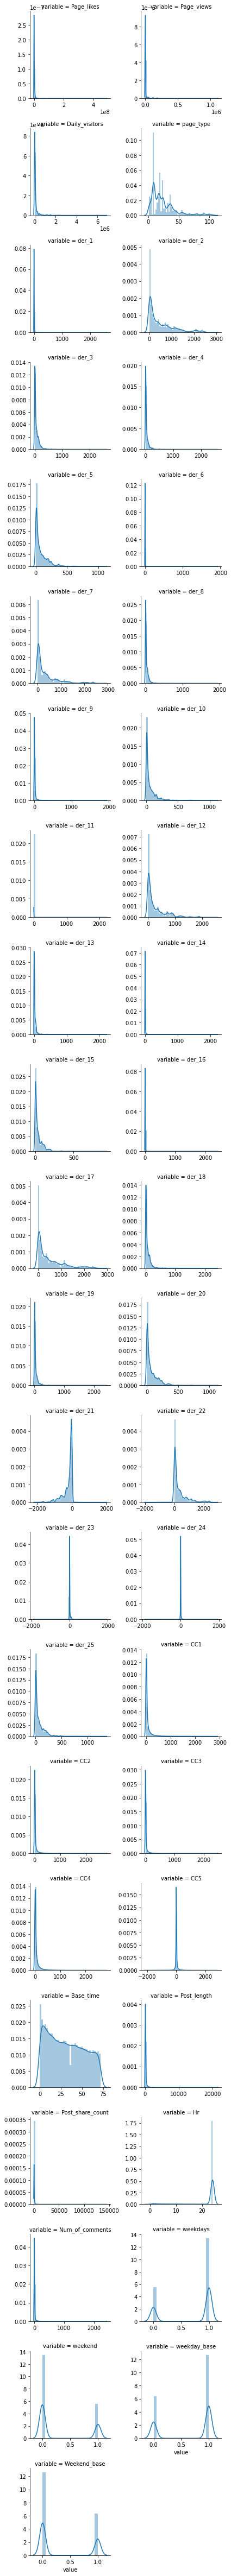

In [29]:
f = pd.melt(df)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

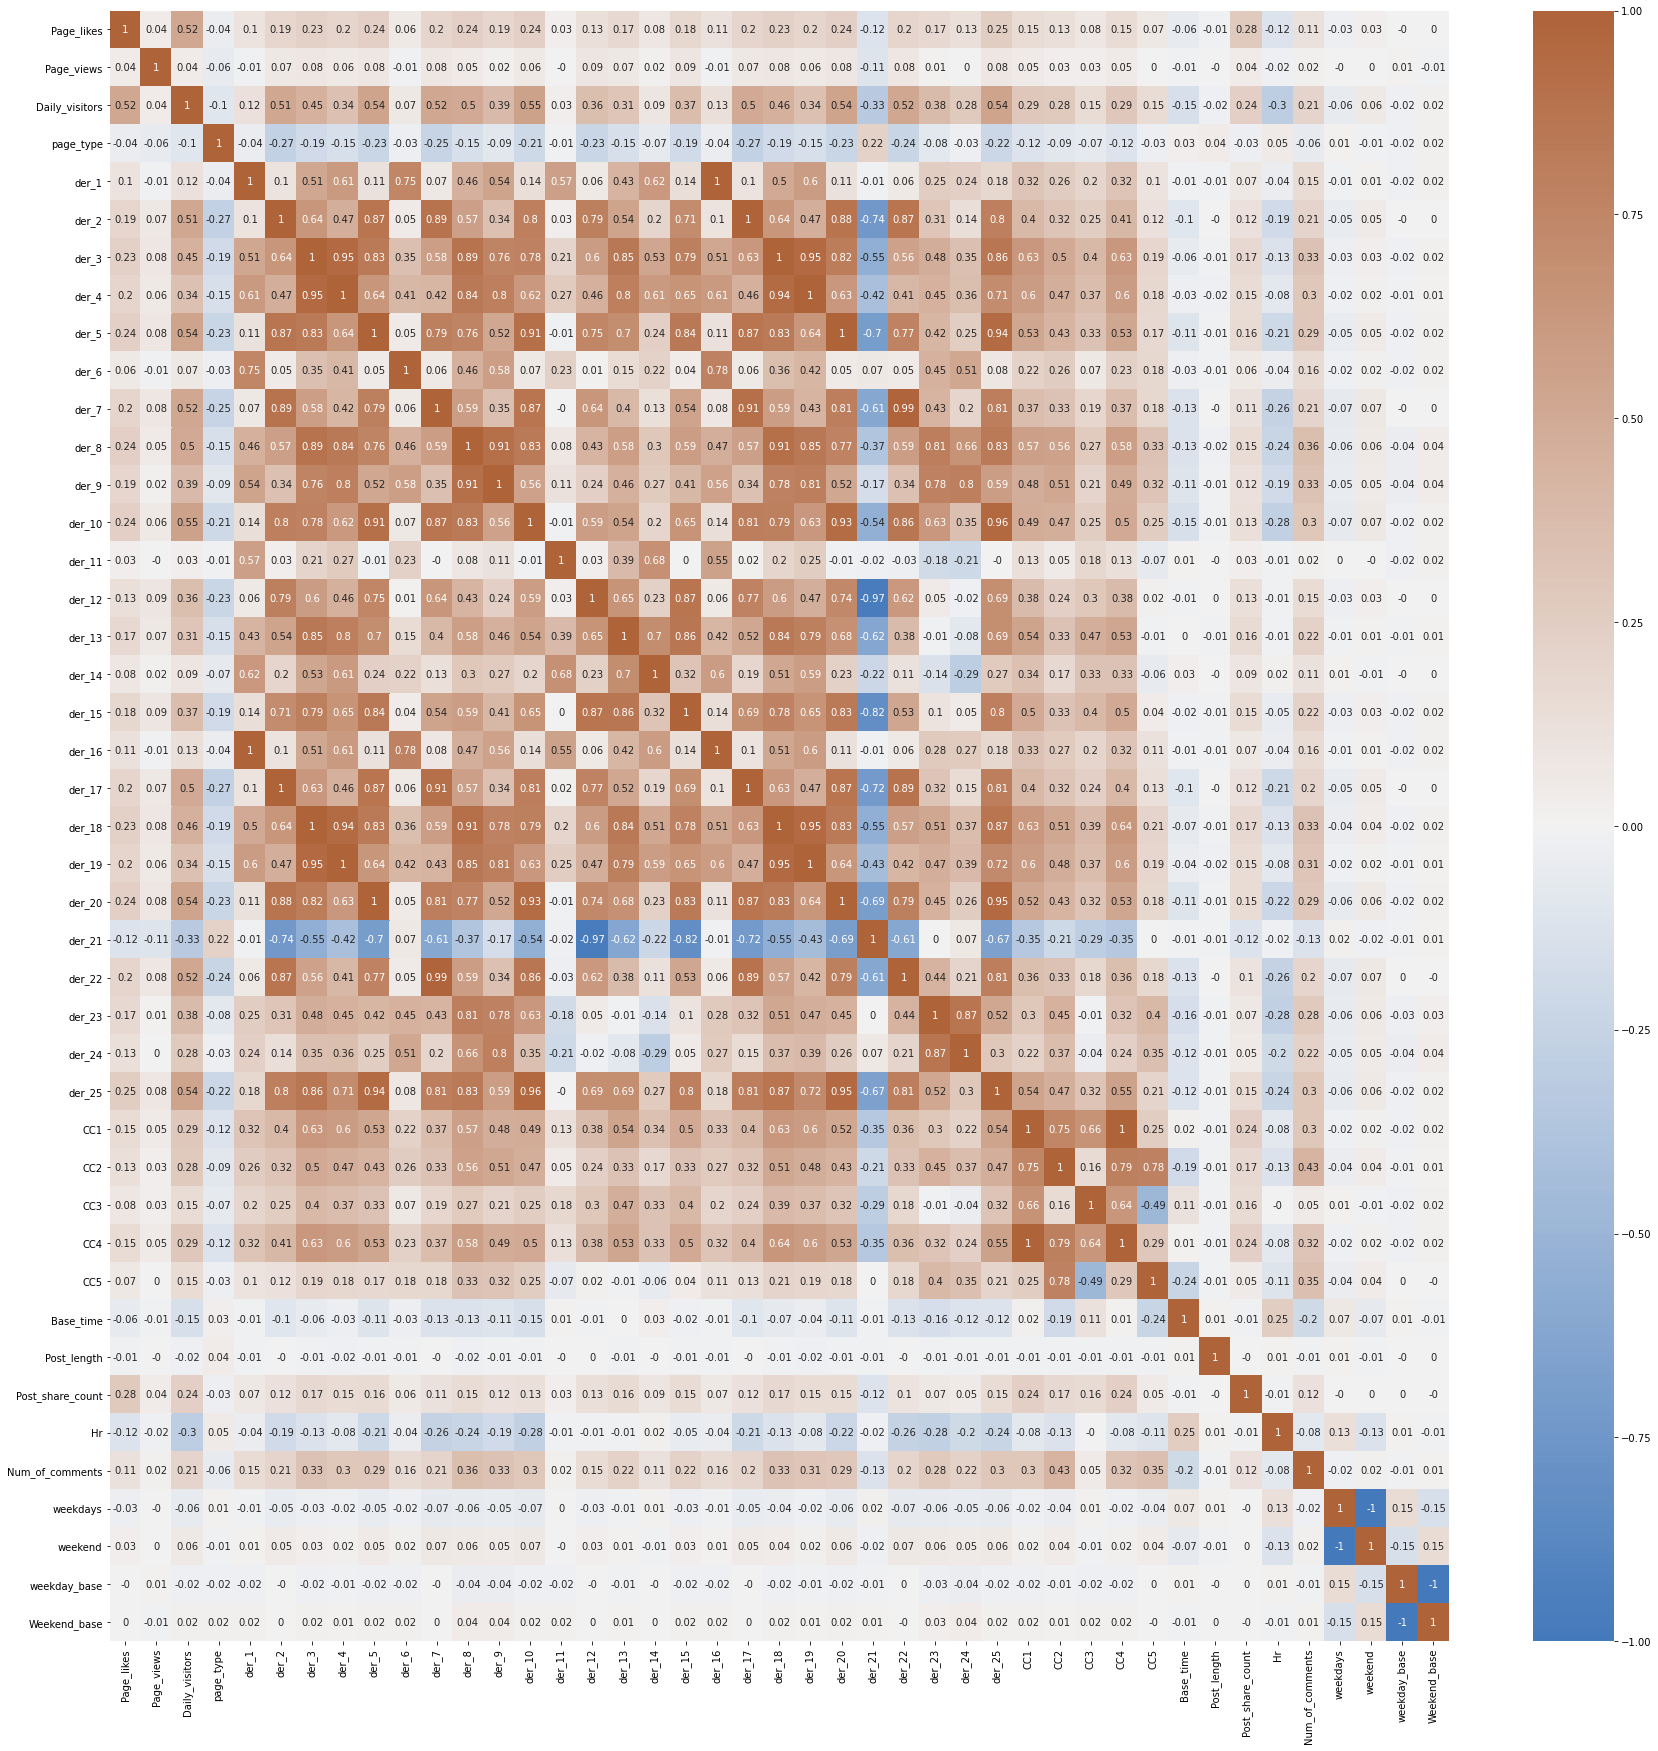

In [30]:
def correlation_heatmap(df):
    _,ax=plt.subplots(figsize=(30,30))
    colormap=sns.diverging_palette(250,30,as_cmap=True)
    sns.heatmap(round(df.corr(),2),annot=True,cmap=colormap)
    
    
correlation_heatmap(df)

In [31]:
corr1=df.corr()
feature_list = corr1["Num_of_comments"].sort_values(ascending=True).tail(30).head(10) 
feature_list.index

Index(['der_14', 'Post_share_count', 'der_12', 'der_1', 'der_16', 'der_6',
       'der_22', 'der_17', 'der_7', 'der_2'],
      dtype='object')

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [33]:
X = df.drop('Num_of_comments',axis=1)
X

,Page_likes,Page_views,Daily_visitors,page_type,der_1,der_2,der_3,der_4,der_5,der_6,der_7,der_8,der_9,der_10,der_11,der_12,der_13,der_14,der_15,der_16,der_17,der_18,der_19,der_20,der_21,der_22,der_23,der_24,der_25,CC1,CC2,CC3,CC4,CC5,Base_time,Post_length,Post_share_count,Hr,weekdays,weekend,weekday_base,Weekend_base
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,65,166,2,24,1,0,0,1
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,10,132,1,24,1,0,1,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,0,0,0,0,0,14,133,2,24,1,0,0,1
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,7,0,3,7,-3,62,131,1,24,1,0,1,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.850580,1,0,0,1,0,58,142,5,24,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50988,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,480,56,424,475,-368,28,94,287,5,0,1,1,0
50989,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,1393,334,1059,1379,-725,27,59,1414,6,0,1,1,0
50990,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,0,0,0,0,0,0,175,673,24,0,1,0,1
50991,7170111,70,497000,9,0.0,2062.0,482.608696,305.0,511.149322,0.0,1387.0,242.869565,161.0,289.229757,0.0,1922.0,239.739130,0.0,468.091799,0.0,1959.0,475.173913,301.0,496.447261,-1782.0,1387.0,3.130435,77.0,586.731574,550,550,0,550,550,14,159,124,5,0,1,1,0


In [34]:
calc_vif(X).sort_values(by='VIF',ascending=False)

,variables,VIF
41,Weekend_base,inf
11,der_8,inf
40,weekday_base,inf
39,weekend,inf
38,weekdays,inf
33,CC5,inf
31,CC3,inf
30,CC2,inf
26,der_23,inf
16,der_13,inf


In [35]:
df.drop(['der_18','der_20','der_4','der_16','der_17','CC4','CC3','der_7','der_10','der_15','der_21','der_24','der_14'],axis=1,inplace=True)

In [36]:
X = df.drop('Num_of_comments',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

,variables,VIF
28,Weekend_base,inf
9,der_8,inf
27,weekday_base,inf
26,weekend,inf
25,weekdays,inf
16,der_23,inf
13,der_13,inf
6,der_3,148.645510
7,der_5,51.123752
14,der_19,41.657568


In [39]:
df['week']=df['weekdays']+df['weekend']
df['week_base']=df['weekday_base']+df['Weekend_base']

In [45]:
df.drop(['weekdays','weekend','weekday_base','Weekend_base'],axis=1,inplace=True)

In [46]:
X = df.drop('Num_of_comments',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

,variables,VIF
11,der_23,inf
8,der_8,inf
9,der_13,inf
6,der_3,109.354531
7,der_5,43.137491
10,der_19,34.031095
12,der_25,13.148268
5,der_2,7.927464
4,der_1,3.743535
2,Daily_visitors,2.107029


In [47]:
df.drop(['der_9','CC1','der_22','der_6','der_11'],axis=1,inplace=True)

KeyError: ignored

In [48]:
X = df.drop('Num_of_comments',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

,variables,VIF
11,der_23,inf
8,der_8,inf
9,der_13,inf
6,der_3,109.354531
7,der_5,43.137491
10,der_19,34.031095
12,der_25,13.148268
5,der_2,7.927464
4,der_1,3.743535
2,Daily_visitors,2.107029


In [51]:
X = df.drop('Num_of_comments',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

,variables,VIF
11,der_23,inf
8,der_8,inf
9,der_13,inf
6,der_3,109.354531
7,der_5,43.137491
10,der_19,34.031095
12,der_25,13.148268
5,der_2,7.927464
4,der_1,3.743535
2,Daily_visitors,2.107029


In [52]:
df.drop(['der_1'],axis=1,inplace=True)
X = df.drop('Num_of_comments',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

,variables,VIF
10,der_23,inf
7,der_8,inf
8,der_13,inf
5,der_3,80.070256
9,der_19,28.429957
6,der_5,26.445904
11,der_25,12.311593
4,der_2,5.614815
2,Daily_visitors,2.099075
12,CC2,1.517509


In [53]:
df.drop(['der_19'],axis=1,inplace=True)
X = df.drop('Num_of_comments',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

,variables,VIF
9,der_23,inf
7,der_8,inf
8,der_13,inf
5,der_3,31.878653
6,der_5,14.620121
10,der_25,12.161467
4,der_2,5.035148
2,Daily_visitors,2.040299
11,CC2,1.517500
0,Page_likes,1.436184


In [54]:
df.drop(['der_5'],axis=1,inplace=True)
X = df.drop('Num_of_comments',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

,variables,VIF
8,der_23,inf
6,der_8,inf
7,der_13,inf
5,der_3,31.480639
9,der_25,7.845093
4,der_2,3.303951
2,Daily_visitors,2.033325
10,CC2,1.517477
0,Page_likes,1.435502
14,Hr,1.235222


In [55]:
df.drop(['der_2'],axis=1,inplace=True)
X = df.drop('Num_of_comments',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

,variables,VIF
5,der_8,inf
6,der_13,inf
7,der_23,inf
4,der_3,31.032534
8,der_25,4.735561
2,Daily_visitors,1.943375
9,CC2,1.517477
0,Page_likes,1.424118
13,Hr,1.235221
12,Post_share_count,1.131566


In [56]:
df.drop(['der_8','der_13','der_23'],axis=1,inplace=True)
X = df.drop('Num_of_comments',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

,variables,VIF
5,der_25,4.526863
4,der_3,4.187877
2,Daily_visitors,1.922214
0,Page_likes,1.423368
6,CC2,1.406869
10,Hr,1.194481
9,Post_share_count,1.126843
7,Base_time,1.110838
3,page_type,1.054076
1,Page_views,1.009514


In [57]:
df.drop(['der_25'],axis=1,inplace=True)
X = df.drop('Num_of_comments',axis=1)
calc_vif(X).sort_values(by='VIF',ascending=False)

,variables,VIF
2,Daily_visitors,1.778513
4,der_3,1.616698
0,Page_likes,1.418418
5,CC2,1.403180
9,Hr,1.166298
8,Post_share_count,1.124128
6,Base_time,1.108432
3,page_type,1.040330
1,Page_views,1.009249
7,Post_length,1.001724


In [58]:
corr1=df.corr()
feature_list = corr1["Num_of_comments"].sort_values().tail(30).head(10) 
feature_list.index

Index(['Base_time', 'Hr', 'page_type', 'Post_length', 'Page_views',
       'Page_likes', 'Post_share_count', 'Daily_visitors', 'der_3', 'CC2'],
      dtype='object')

In [62]:
Features_final = ['Base_time', 'page_type', 'Post_length', 'Hr',
       'Page_likes', 'der_3', 'CC2', 'Post_share_count',
       'Daily_visitors','Num_of_comments']

In [63]:
df_final = df[Features_final]
df_final.describe()

,Base_time,page_type,Post_length,Hr,Page_likes,der_3,CC2,Post_share_count,Daily_visitors,Num_of_comments
count,50993.000000,50993.000000,50993.000000,50993.000000,5.099300e+04,50993.000000,50993.000000,50993.000000,5.099300e+04,50993.000000
mean,31.764242,23.724727,160.850117,21.903300,1.877146e+06,64.586630,32.063872,126.133999,9.133800e+04,11.639951
std,21.341024,19.897647,365.542728,5.726684,7.533330e+06,107.423840,115.512024,913.666559,2.636394e+05,60.777460
min,0.000000,1.000000,0.000000,0.000000,3.600000e+01,0.000000,0.000000,1.000000,0.000000e+00,0.000000
25%,13.000000,9.000000,39.000000,24.000000,5.862600e+04,6.151515,0.000000,2.000000,1.484000e+03,0.000000
50%,30.000000,18.000000,97.000000,24.000000,4.169480e+05,26.944206,2.000000,14.000000,1.404100e+04,0.000000
75%,50.000000,32.000000,170.000000,24.000000,1.720897e+06,84.230769,17.000000,66.000000,7.301100e+04,4.000000
max,72.000000,107.000000,21480.000000,24.000000,4.869723e+08,2575.000000,2783.000000,144860.000000,6.784263e+06,2412.000000


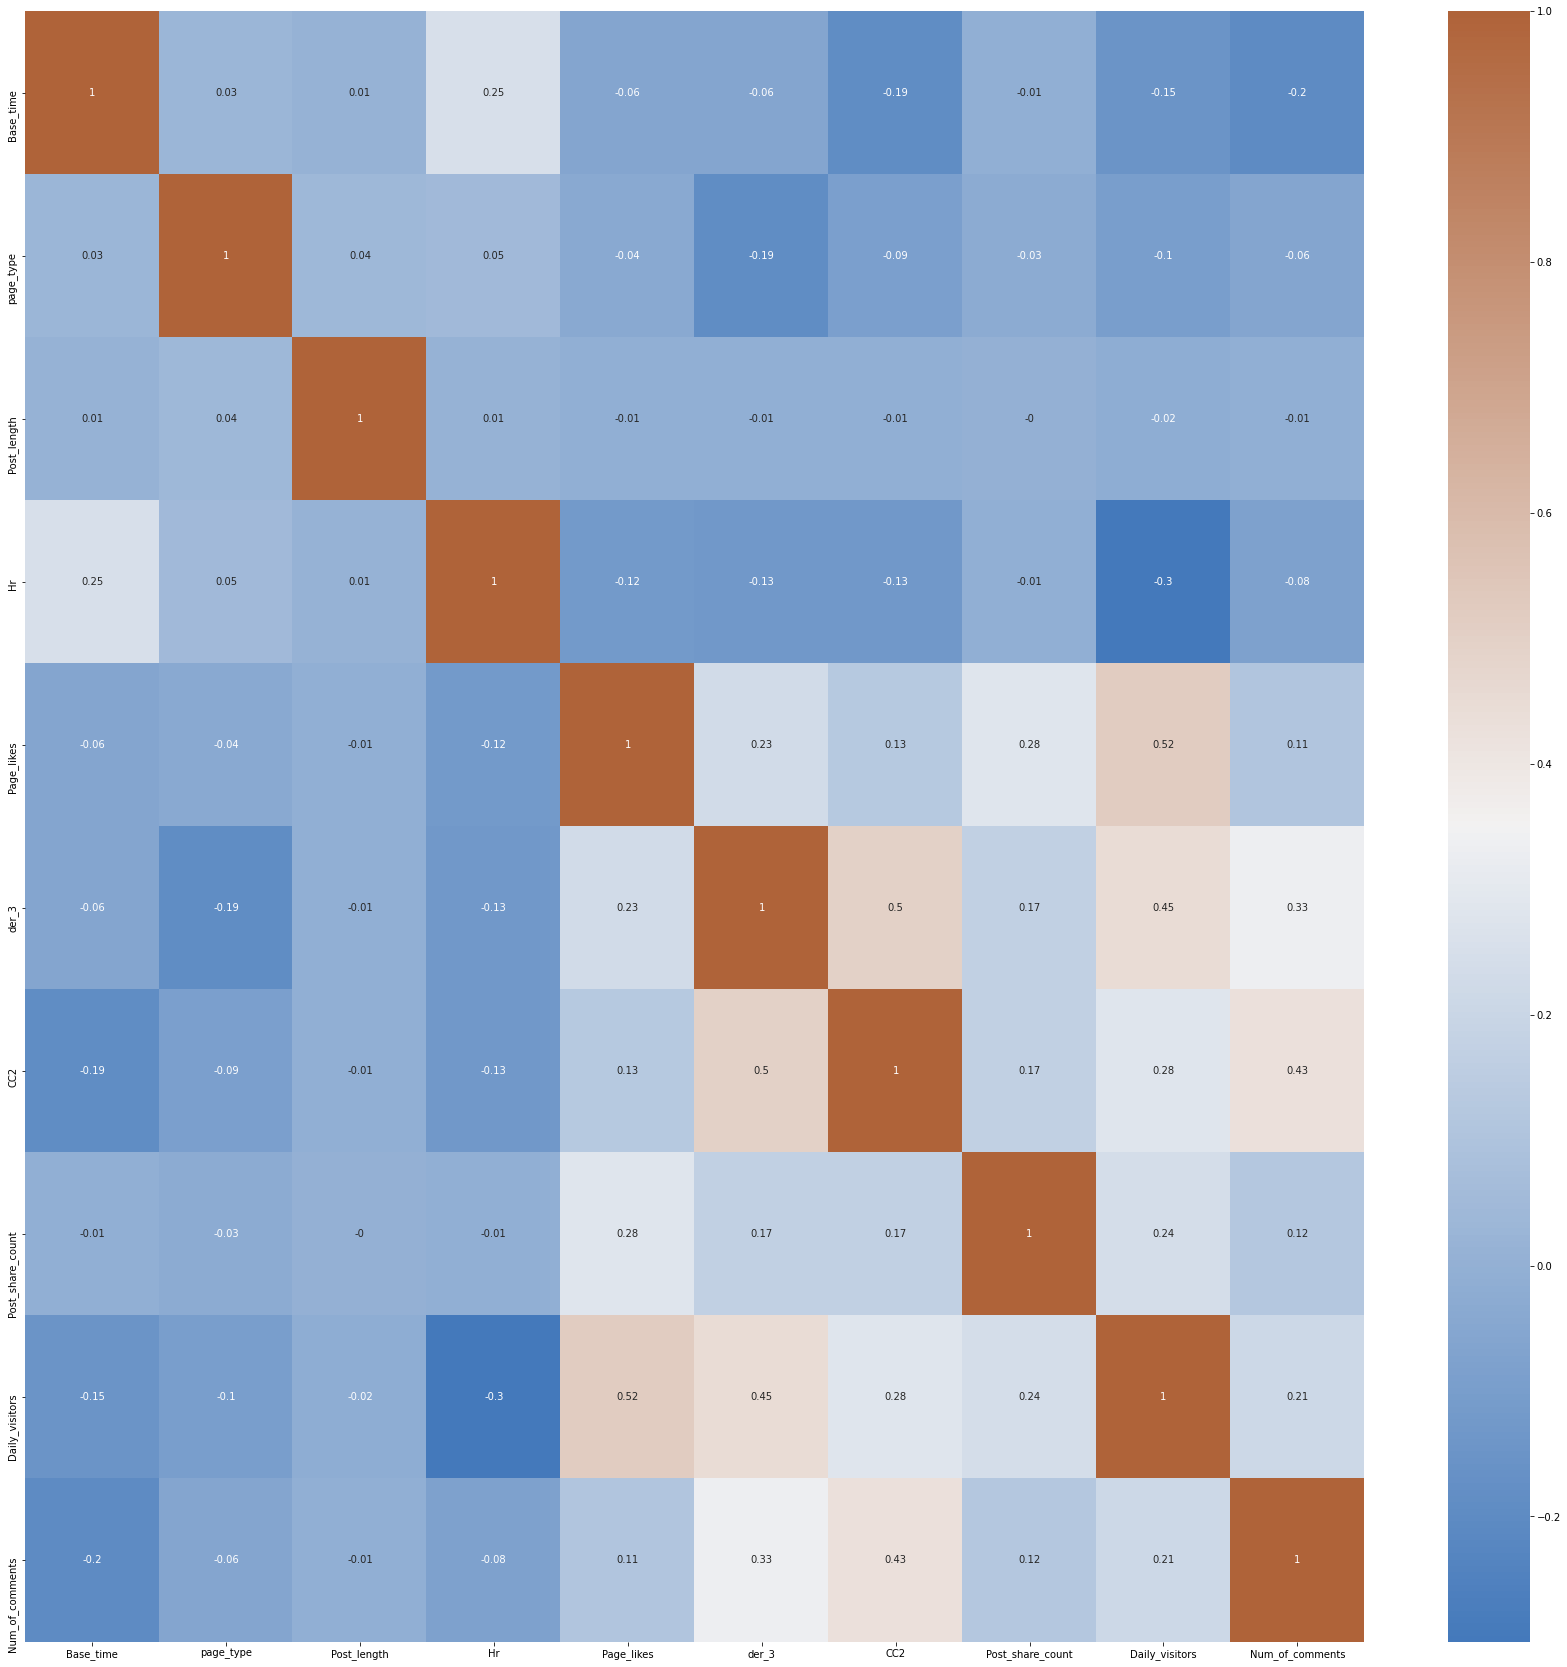

In [64]:
correlation_heatmap(df_final)

In [65]:
df_final

,Base_time,page_type,Post_length,Hr,Page_likes,der_3,CC2,Post_share_count,Daily_visitors,Num_of_comments
0,65,1,166,24,634995,11.291045,0,2,463,0
1,10,1,132,24,634995,11.291045,0,1,463,0
2,14,1,133,24,634995,11.291045,0,2,463,0
3,62,1,131,24,634995,11.291045,0,1,463,0
4,58,1,142,24,634995,11.291045,0,5,463,0
...,...,...,...,...,...,...,...,...,...,...
50988,28,9,94,5,7170111,482.608696,56,287,497000,1
50989,27,9,59,6,7170111,482.608696,334,1414,497000,13
50990,0,9,175,24,7170111,482.608696,0,673,497000,1087
50991,14,9,159,5,7170111,482.608696,550,124,497000,14


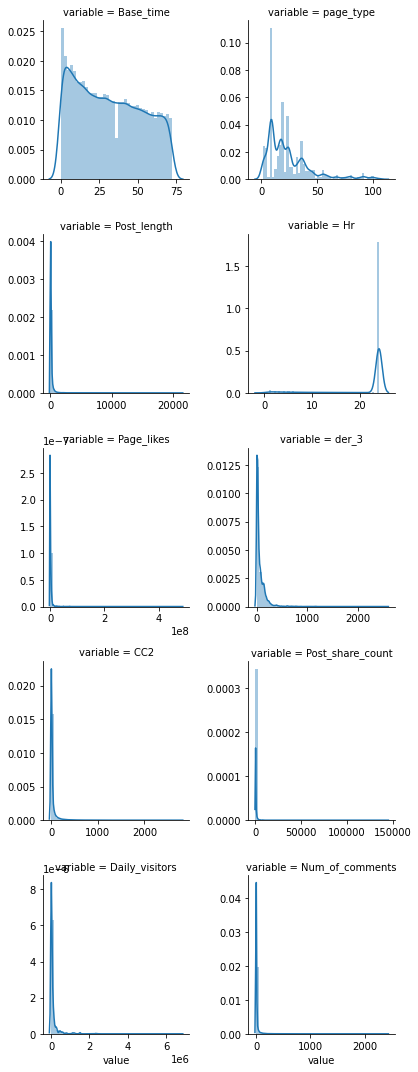

In [66]:
f = pd.melt(df_final)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [67]:
Q1,Q3 = np.percentile(df_final['Num_of_comments'],[25,75])
IQR = Q3-Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
print(lower_range)
print(upper_range)

-6.0
10.0


In [68]:
df_final.drop(df_final[(df_final.Num_of_comments > upper_range) | (df_final.Num_of_comments < lower_range)].index , inplace=True)

In [69]:
X = df_final.iloc[:,0:-1]
Y = df_final.iloc[:,-1]

In [70]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.2)

#applying feature scaling, specifically min-max scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#using training data's min and max for scaling the testing data
X_train.shape

(34827, 9)

In [72]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
y_pred=model.predict(X_test)

In [74]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.2800421033189703